# Practica de Visualización

Un dataset de NOAA está almacenado en el archivo `data/fb441e62df2d58994928907a91895ec62c2c42e6cd075c2700843b89.csv`. Este es el dataset que utilizaremos para la práctica.

Nota: Los datos para esta práctica forman parte de un dataset perteneciente a The data for this assignment comes from a subset of The National Centers for Environmental Information (NCEI) [Daily Global Historical Climatology Network](https://www1.ncdc.noaa.gov/pub/data/ghcn/daily/readme.txt) (GHCN-Daily). El GHCN-Daily se compone de registros climáticos diarios de miles de estaciones de la superficie terrestre en todo el mundo.

Cada fila en el archivo de datos corresponde a una sola observación.

Nos proporciona las siguientes variables:

- **id** : código de identificación de la estación
- **date** : fecha en formato YYYY-MM-DD (por ejemplo: 2012-01-24 = 24 de enero de 2012)
- **element** : indica el tipo de medición
    - **TMAX** : Temperatura máxima
    - **TMIN** : Temperatura mínima
- **value**: valor de la temperatura (en décimas de grados centígrados)

## Indicaciones

1. Lee la documentación y familiarícese con el conjunto de datos, luego escriba un código python que arroje un gráfico lineal de las temperaturas máximas y mínimas récord por día del año durante el período 2005-2014. El área entre las temperaturas máximas y mínimas récord de cada día debe estar sombreada.
2. Superponga una dispersión de los datos de 2015 para cualquier punto (máximos y mínimos) para los cuales se superó el récord de diez años (2005-2014) máximo o mínimo histórico en 2015.
3. Debes tener cuidado con los días bisiestos (es decir, el 29 de febrero), es totalmente razonable eliminar estos puntos del conjunto de datos para esta visualización.
4. ¡Haz que la imagen sea agradable! Considera problemas como leyendas, etiquetas y líneas en demasía.

Los datos proporcionados están cerca de **Ann Arbor, Michigan, Estados Unidos**.

In [23]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

#Tu código a partir de aquí
df = pd.read_csv("../data/fb441e62df2d58994928907a91895ec62c2c42e6cd075c2700843b89.csv", parse_dates=['Date'])

df = df[~((df['Date'].dt.month == 2) & (df['Date'].dt.day == 29))]

#Convertir los valores de décimas a grados celsius
df['Data_Value'] = df['Data_Value'] / 10

In [24]:
#1) Columnas auxiliares (sin renombrar)
df['year'] = df['Date'].dt.year
df['month_day'] = df['Date'].dt.strftime('%m-%d')

#2) Separar períodos
df_hist = df[(df['year'] >= 2005) & (df['year'] <= 2014)].copy()
df_2015 = df[df['year'] == 2015].copy()

#3) Récords históricos (2005–2014) por día calendario
tmax_hist = (df_hist[df_hist['Element'] == 'TMAX']
    .groupby('month_day')['Data_Value']
    .max())
tmin_hist = (df_hist[df_hist['Element'] == 'TMIN']
    .groupby('month_day')['Data_Value']
    .min())

#4) Valores de 2015 por día
tmax_2015 = (df_2015[df_2015['Element'] == 'TMAX']
    .groupby('month_day')['Data_Value']
    .max())
tmin_2015 = (df_2015[df_2015['Element'] == 'TMIN']
    .groupby('month_day')['Data_Value']
    .min())

In [25]:
#Récords batidos en 2015
record_high_2015 = tmax_2015[tmax_2015 > tmax_hist]  # nuevos máximos
record_low_2015  = tmin_2015[tmin_2015 < tmin_hist]  # nuevos mínimos

In [ ]:
# Agrupar por 'Month-Day' y tomar el récord (max y min)
tmax_grouped = tmax.groupby('Month-Day')['Data_Value'].max()
tmin_grouped = tmin.groupby('Month-Day')['Data_Value'].min()


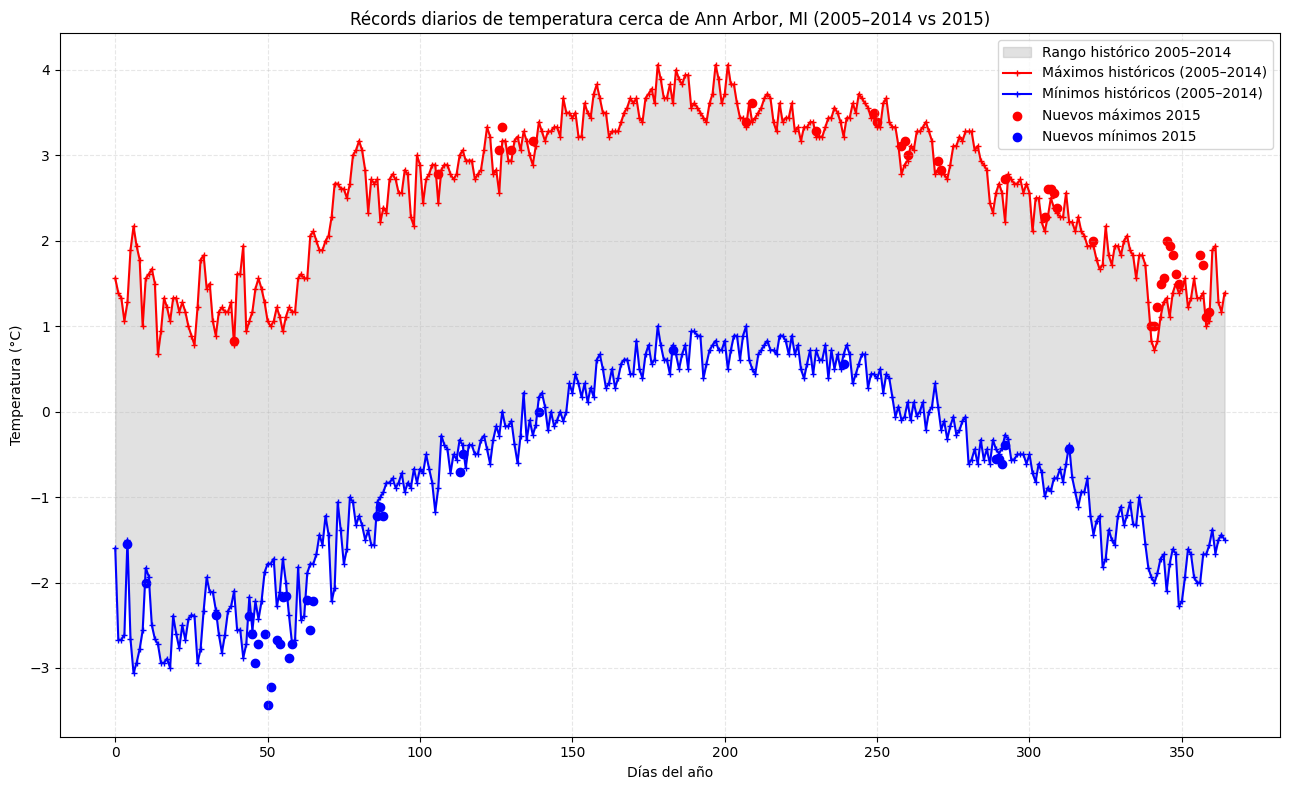

In [31]:
x_all = range(len(tmax_hist))
md_list = list(tmax_hist.index)

pos_high = [md_list.index(md) for md in record_high_2015.index]
pos_low  = [md_list.index(md) for md in record_low_2015.index]

tmax_hist_c = tmax_hist.values / 10
tmin_hist_c = tmin_hist.values / 10
rec_high_c  = record_high_2015.values / 10
rec_low_c   = record_low_2015.values / 10

#Por seguridad, asegurar orden (mín <= máx) antes de sombrear
upper = np.maximum(tmax_hist_c, tmin_hist_c)
lower = np.minimum(tmax_hist_c, tmin_hist_c)

#Gráfico
plt.figure(figsize=(13, 8))

#Sombreado entre mínimos y máximos históricos
plt.fill_between(x_all, upper, lower, alpha=0.35, color='darkgrey',
                 label='Rango histórico 2005–2014')

#Línea de máximos históricos
plt.plot(x_all, tmax_hist_c, color='r', marker='+', markersize=4,
         label='Máximos históricos (2005–2014)')

#Línea de mínimos históricos
plt.plot(x_all, tmin_hist_c, color='b', marker='+', markersize=4,
         label='Mínimos históricos (2005–2014)')

#Puntos 2015 que baten récords
plt.scatter(pos_high, rec_high_c, marker='o', color="red",  label='Nuevos máximos 2015')
plt.scatter(pos_low, rec_low_c,  marker='o', color="blue", label='Nuevos mínimos 2015')

#Etiquetas y leyenda
plt.title('Récords diarios de temperatura cerca de Ann Arbor, MI (2005–2014 vs 2015)')
plt.xlabel('Días del año')
plt.ylabel('Temperatura (°C)')
plt.legend()
plt.grid(alpha=0.3, linestyle='--')

plt.tight_layout()
plt.show()